# Training Simple Machine Learning Algorithm for Classification

In this chapter, we will make use of two of the first algorithmically described machine learning algorithms for classification, the perceptron and adaptive linear neurons. We will start by implementing a perceptron step by step in Python and training it to classify different flower species in the Iris dataset. This will help us to understand the concept of machine learning algorithms for classification and how they can efficiently implemented in Python. 

The topics that we will cover in this chapter are as follows:
* Building an intuition of machine learning algorithms
* Using Pandas, NumPy, and Matplotlib to read int, process, and visualize data
* Implementing linear classification algorithms in Python

# Artificial neurons - a brief glimpse into the early history of machine learning

Trying to nderstand how the biological brain works, in order to design AI, Warren McCullock and Walter Pitts published the first concept of a simplified brain cell, the so-called **McCullock-Pitts (MCP) neuron**, in 1943. Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals, which is illustrated in the following figure:

<img src='images/02_01.png'>

McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon. 

Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model. With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belongs to one class or the other.

# The formal definition of an artificial neuron

More formally, we can put the idea behind **artificial neurons** into the context of a binary classification task where **we refer to out two classes as 1 (positive class) and -1 (negative class)** for simplicity. We can then define a decision function $\phi(z)$ that takes a linear combination of certain input values $x$ and a corresponding weight vetor $w$, where $z$ is the so-called net input: $z = w_1 \cdot x_1 + ... + w_m \cdot x_m$

Now, if the net input of a particular sample $x^{(i)}$ is greater than a defined threshold $\theta$, we predict class 1, and class -1 otherwise. In the perceptron algorithm, the decision function $\phi$ is a variant of a **unit step function**:

\begin{equation}
\phi(z) = 
\begin{cases}
    -1, & \text{if}\ z \ge \theta \\
    1, & \text{otherwise}
\end{cases}
\end{equation}

For simplicity, we can bring the threshold $\theta$ to the left side of the equation and define a weight-zero as $w_0 = -\theta$ and $x_0 = 1$ so that we write $z$ in the more compact form: 

$$z = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_m \cdot x_m = w^T \cdot x$$

And:

\begin{equation}
\phi(z) = 
\begin{cases}
    1, & \text{if}\ z \ge \theta \\
    -1, & \text{otherwise}
\end{cases}
\end{equation}

In machine learning literature, the negative threshold, or weight, $w_0 = -\theta$, is usually called the **bias unit**. 

The following figure illustrates how the net input $z = w^T \cdot x$ is squashed into a binary output (-1 or 1) by the decision function of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes (right subfigure):

<img src='images/02_02.png'>

# The perceptron learning rule

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it does not. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps: 
1. Initialize the weights to 0 or small random numbers. 
2. For each training sample $x^{(i)}$:
    1. Compute the output value $ŷ$. 
    2. Update the weights.

Here, the output value is the class label predict by the unit step function that we defined earlier, and the simultaneous update of each weight $w_j$ in the weight vector $w$ can be more formally written as:
$$w_j = w_j + \Delta w_j$$

The value of $\Delta w_j$, which is used to update the weight $w_j$, is calculated by the perceptron learning rule:
$$\Delta w_j = \alpha \cdot (y^{(i)} - ŷ^{(i)}) \cdot x^{(i)}_j$$

Where $\alpha$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the **true class label** of the *i*th training sample, and $ŷ^{(i)}$ is the **predicted class label**. It is important to note that all weights in the weight vector are being updated simultaneously, which means that we do not recompute the $ŷ^{(i)}$ before all of the weights $\Delta w_j$ are updated. 

Before we implement the perceptron rule in Python, let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged: 

$$\Delta w_j = \alpha \cdot (-1--1) \cdot x^{(i)}_j = 0$$

$$\Delta w_j = \alpha \cdot (1-1) \cdot x^{(i)}_j = 0$$

However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class:

$$\Delta w_j = \alpha \cdot (1--1) \cdot x^{(i)}_j = \alpha \cdot (2) \cdot x^{(i)}_j$$

$$\Delta w_j = \alpha \cdot (-1-1) \cdot x^{(i)}_j = \alpha \cdot (-2) \cdot x^{(i)}_j$$

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are **linearly separable** and **the learning rate is sufficiently small**. If the two classes cannot be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (**epochs**) and/or threshold for the number of tolerated misclassifications, the perceptron would never stop updating the weights otherwise: 

<img src='images/02_03.png'>

Now, before we jump into the immplementation in the next section, letus summarize what we just learned in a simple diagram that illustrates the general concept of the perceptron: 

<img src='images/02_04.png'>

The preceding diagram illustrates how the perceptron receives the inputs of a sample $x$ and combines them with the weights $w$ to compute the net input. The net input is then passed on the threshold function, which generates a binary output, -1 or +1, the predicted class label for the sample. During the learning phase, this output is used to calculate the error of the prediction and update the weights.

# Implementing a perceptron learning algorithm in Python

In the previous section, we learned how the Rosenblatt's perceptron rule works; let us now go ahead and implement it in Python, and apply it to the Iris dataset.

We will take an object-oriented approach to define the perceptron interface as a Python class, which allows us to initialize new *Perceptron* objects that can learn from data via a *fit* method, and make predictions via a separate *predict* method. As a convention, we append an underscore (\_) to attributes that are not being created upon the initialization of the object but by calling the object's other methods, for example, *self.w\_*. The followng is the implementation of a perceptron:

In [4]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier. 
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. 
    random_state : int
        Random number generator seed for random weight 
        initialization. 
        
    Attributes
    ---------------
    w_ : 1d-array
        Weights after fitting. 
    errors_ : list
        Number of misclassifications (updates) 
        in each epoch.     
    """
    
    def __init__(self, eta=0.01, n_iter=50, 
                 random_state=1): 
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ---------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the 
            number of samples and n_features is the 
            number of features. 
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ---------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = (self.eta * 
                         (target - self.predict(xi)))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Using this perceptron implementation, we can now initialize new *Perceptron* objects with a given learning rate *eta* and *n_iter*, which is the number of epochs (passes over the training set). Via the *fit* method, we initialize the weights in *self.w\_* to a vector of float numbers in the shape $m + 1$, where $m$ stands for the number of dimensions (features) in the dataset, where we add 1 for the first element in this vector that represents the bias unit. Remember that the first element in this vector, *self.w\_[0]*, represent the so-called bias unit that we discussed earlier. 

Also notice that this vector contains small random numbers drawn from a normal distribution with standard deviation $0.01$ via *rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])*, where *rgen* is a NumPy random number generator that we seeded with a user-specified random seed so that we can reproduce previous results if desired. 

Now, the reason we do not initialize the weights to zero is that the learning rate $\alpha$ (eta) only has an effect on the classification outcome if the weights are initialized to non-zero values. If all the weights are initialized to zero, the learning rate parameter *eta* affects only the scale of the weight vector, not the direction. 

The reason why we have drawn the random numbers from a random normal distribution, for example, instead from a uniform distribution, and why we used a standard deviation of 0.01 was arbitrary; remember, we are just interested in small random values to avoid the properties of all-zero vectors as discussed earlier. 

After the weights have been initialized, the *fit* method loops over all individual samples in the training set and updates the weights according to the perceptron learning rule that we discussed in the previous section. The class labels are predicted by the *predict* method, which is called in the *fit* method to predict the class labels of new data after we have fitted our model. Futhermore, we also collect the number of misclassifications during each epoch in the *self.errors\_* list so that we can later analyze how well our perceptron performed during the training. The *np.dot* function that is used in the *net_input* method simply calculates the vector dot product $w^T \cdot x$. 

# Training a perceptron model on the Iris Dataset

To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris dataset. Although the perceptron rule is not restricted to two dimensions, we will only consider the two features sepal length and petal length for visualization purposes. Also, we only chose the two flower classes Setosa and Versicolor for practical reasons. However, the perceptron algorithm can be extended to multi-class classification, for example, the **One-versus-All (OvA)** technique. 

OvA, or sometimes also called **One-versus-Rest (OvR)**, is a technique that allows us to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the samples from all other classes are considered negative classes. In we were to classify a new data sample, we would use our *n* classifiers, where *n* is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value. 

First, we will use the *Pandas* library to load the Iris dataset directly from the *UCI Machine Learning Repository* into a *DataFrame* object and print the last five line via the *tail* method to check the data was loaded correctly:

In [5]:
import pandas as pd

# To work offline: 
df = pd.read_csv('data/iris.data', header=None)

# To work online: 
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases/iris/'
#                  'iris.data', header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Next, we extract the first 100 class labels that correspond to the 50 *Iris-setosa* and 50 *Iris-versicolor* flowers, and convert the class labels into the two integer class label 1 (versicolor) and -1 (setosa) that we assign to a vetor *y*, where the *values* method of Pandas *DataFrame* yields the corresponding NumPy representation. 

Similarly, we extract the first feature column (sepal length) and the third feature (petal length) of those 100 training samples and assign them to a feature matrix x, which we can visualize via a two-dimensional scatter plot:

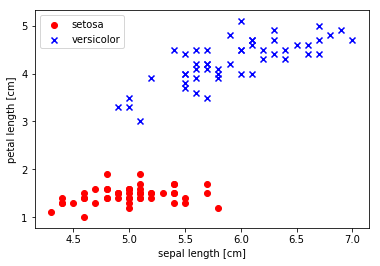

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', 
            marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', 
            marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

The preceding scatterplot shows the distribution of flower samples in the Iris dataset along the two features axes, petal length and sepal length. In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate Setosa from Versicolor flowers. Thus, a linear classifier such as perceptron should be able to classify the flowers in this dataset perfectly. 

Now, it's time to train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that separates the two Iris flower classes: 

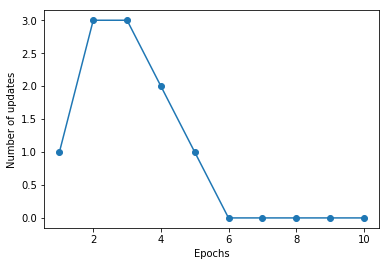

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

As we can see in the preceding plot, our perceptron converged after the sixth epoch and should now be able to classify the training samples perfectly. Let us implement a small convenience function to visualize the decision boundaries for two-dimensional datasets:

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

First, we define a number of *color* and *markers* and create a colormap from the list of colors via *ListedColorMap*. Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays *xx1* and *xx2* via the NumPy *meshgrid* function. Since we trained our perceptron classifier on two feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the *predict* method to predict the class labels *z* of the corresponding grid points. 

After reshaping the predicted class labels Z into a grid with the same dimensions as *xx1* and *xx2*, we can now draw a contour plot via Matplotlib *contourf* function, which maps the different decision regions to different colors for each predicted class in the grid array:

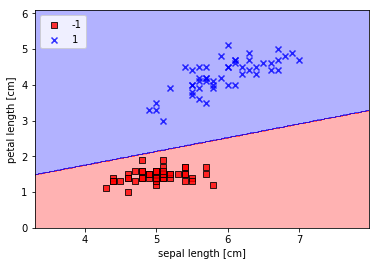

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As we can see in the plot, the perceptron learned a decision boundary that is able to classify all flower samples in the Iris training subset perfectly.

# Adaptive linear neurons and the convergence of learning

In this section, we will take a look at another type of single-layer neural network: **ADAptive LInear NEuron (Adaline)**. Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff, only a few years after Frank Rosenblatt's perceptron algorithm, and can be considered as an improvement on the latter. 

The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous cost functions. This lays the groundwork for understand more advanced machine learning algorithms for classification, such as logistic regression, support vector machines, and regression models, which we will discuss in future chapters. 

The key difference between the Adaline rule (also known as the *Widrow-Hoff rule*) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function $\phi(z)$ is simply the identity function of the net input, so that:

$\phi(w^T \cdot x) = w^T \cdot x$

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction, which is similar to the unit step function that we have seen earlier. The main differences between the perceptron and Adaline algorithm are highlighted in the following figure: 

<img src='images/02_09.png'> 

This illustration shows that the Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels. 

# Minimizing cost functions with gradient descent

One of the key ingredients of supervised machine learning algorithms is a defined **objective function** that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. In the case of Adaline, we can define a cost function $J$ to learn the weights as the **Sum of Squared Errors (SSE)** between the calculated outcome and the true class label:

$$J(w) = \frac{1}{2}\sum_{i}(y^{(i)} - \phi(z^{(i)}))^2$$

The term $\frac{1}{2}$ is just added for our convenience, which will make it easier to derive the gradient, as we will see in the following paragraphs. The main advantage of this continuous linear activation function, in contrast of the unit step function, is that the cost function becomes differentiable. Another nice property of this cost function is that it is convex, thus, we can use a simple yet powerful optimization algorithm called **gradient descent** to find the weights that minimize our cost function to classify the samples of the Iris dataset. 

As illustrated in the following figure, we can describe the main idea behind gradient descent as *climbing down a hill* until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient where the step size is determined by the value of the learning rate, as well as the slope of the gradient:

<img src='images/02_10.png'>

Using the gradient descent, we can now update the weights by taking a step in the opposite direction of the gradient $\nabla J(w)$ of our cost function $J(w):$

$$w = w + \Delta w$$

Where the weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\alpha$: 

$$\delta w = -\alpha \cdot \nabla J(w)$$

To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight $w_j$: 

$$\frac{\partial J}{\partial w_j} = -\sum_{i}(y^{(i)} - \phi(z^{(i)})) \cdot x^{(i)}_j$$

So that we can write the update of weight $w_j$ as: 

$$\Delta w_j = -\alpha \cdot \frac{\partial J}{\partial w_j} = \alpha \cdot \sum_{i}(y^{(i)} - \phi(z^{(i)})) \cdot x^{(i)}_j$$

Since we update all weights simultaneously, our Adaline learning rule becomes: 

$$w = w + \Delta w$$

Although the Adaline learning rule looks identical to the perceptron rule, we should note that the $\phi(z^{(i)})$ with $w^T \cdot x^{(i)}$ is a real number and not an integer class label. Furthermore, the weight update is calculated based on all samples in the training set (instead of updating the weights incrementally after each sample), which is why this approach is also referred to as **batch gradient descent**. 

# Implementing Adaline in Python

Since the perceptron rule and Adaline are very similar, we will take the perceptron implementation that we defined earlier and change the *fit* method so that the weights are updated by minimizing the cost function via gradient descent:

In [10]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier. 
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. 
    random_state : int
        Random number generator seed for random weight 
        initialization. 
        
    Attributes
    ---------------
    w_ : 1d-array
        Weights after fitting. 
    cost_ : list 
        Sum-of-squares cost function value in each epoch. 
    """
    
    def __init__(self, eta=0.01, n_iter=50, 
                 random_state=1): 
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ---------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the 
            number of samples and n_features is the 
            number of features. 
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ---------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, X):
        """Compute linear activation"""
        return X
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) 
                        >= 0.0, 1, -1)

Instead of updating the weights after evaluating each individual training sample, as in perceptron, we calculate the gradient based on the whole training dataset via *self.eta * errors.sum()* for the bias unit (zero-weight) and via *self.eta * X.T.dot(errors)* for the weights 1 to *m* where *X.T.dot(errors)* is a matrix-vector multiplication between our feature matrix and the error vector. 

Please note that the *activation* function method as no effect in the code since it is simply an identity fuction. Here, we added the activation function (computed via the *activation* method) to illustrate how information flows through a single layer neural network: features from the input data, net input, activation, and output. In the next chapter, we will learn about a logistic regression classifier that uses a non-identity, nonlinear activation function. We will see that a logistic regression model is closely related to Adaline with the only difference being its activation and cost function. 

Now, similar to the previous perceptron implementation, we collect the cost values in the *self.cost_* list to check whether the algorithm converged after training. 

In practice, it often requires some experimentation to find a good learning rate $\alpha$ for optimal convergence. So, let's choose two different learning rates, $\alpha = 0.1$ and $\alpha = 0.0001$, to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data. 

Let us now plot the cost against the number of epochs for the two different learning rates:

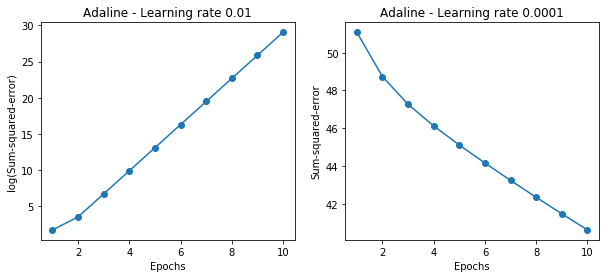

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), 
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), 
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problems. The left chart shows that could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we *overshoot* the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate $\alpha = 0.0001$ is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum. 

The following picture illustrates what might happen if we change the value of a particular weight parameter to minimize the cost function $J$. The left subfigure illustrates the case of a well-chosen learning rate, where the cost decreases gradually, moving in the direction of the global minimum. The subfigure on the right, however, illustrates what happens if we choose a learning rate that is too large, we oveshoot the global minimum: 

<img src='images/02_12.png'>

# Improving gradient descent through feature scaling

Many machine learning algorithms that we will encounter throughout this book require some sort of feature scaling for optimal performance, which we will discuss in more detail later. 

Gradient descent is one of the many algorithms that benefit from feature scaling. In this section, we will use a feature scaling method called **standardization**, which gives our data the property of a standard normal distribution, which helps gradient descent learning to converge more quickly. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1. For instance, to stardardize the *j*th feature, we can simply subtract the sample mean $\mu_j$ from every training sample and divide it by its stardard deviation $\sigma_j$: 

$$x'_j = \frac{x_j - \mu_j}{\sigma_j}$$

Here, $x_j$ is a vector consisting of the *j*th feature values of all training samples *n*, and this stardardization technique is applied to each feature *j* in our dataset. 

One of the reasons why stardardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution (the global cost minimum), as illustrated in the following figure, where the subfigures represent the cost surface as a function of two model weights in a two-dimensional classification problem:

<img src='images/02_13.png'>

Standardization can easily be achieved using the built-in NumPy methods *mean* and *std*: 

In [12]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

After stardardization, we will train Adaline again and see that it now converges after a small number of epochs using a learning rate $\alpha = 0.01$: 

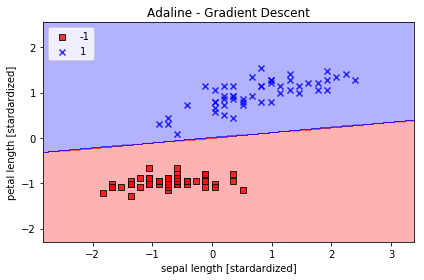

In [13]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [stardardized]')
plt.ylabel('petal length [stardardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

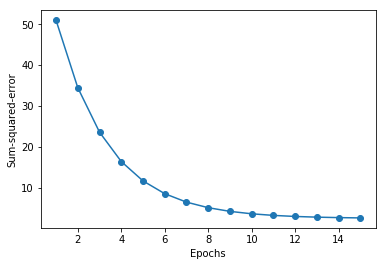

In [14]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, 
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

As we can see in the plots, Adaline has now converged after training on the stardardized features using a learning rate $\alpha = 0.01$. However, note that the SSE remains non-zero even though all samples were classified correctly. 

# Large-scale machine learning and stochastic gradient descent

In the previous section, we learned how to minimize a cost function by taking a step in the opposite direction of a cost gradient that is calculated from the whole training set; this is why this approach is sometimes algo referred to as **batch gradient descent**. Now imagine we have a very large dataset with millions of data points, which is not uncommon in many machine learning applications. Running batch gradient descent can be computationally quite costly in such scenarios since we need to reevaluate the whole training dataset each time we take one step towards the global minimum. 

A popular alternative to the batch gradient descent algoritm is **stochastic gradient descent**, sometimes also called **iterative or online gradient descent**. Instead of updating the weights based on the sum of the accumulated errors over all samples $x^{(i)}: $

$$\Delta w = \alpha \cdot \sum_i (y^{(i)} - \phi(z^{(i)})) \cdot x^{(i)}$$

We update the weights incrementally for each training sample: 

$$\alpha \cdot (y^{(i)} - \phi(z^{(i)})) \cdot x^{(i)}$$

Although stochastic gradient descent can be considered as an approximation of gradient descent, it typically reaches convergence much faster because of the more frequent weights updates. Since each gradient is calculated based on a single training example, the error surface is noisier than in gradient descent, which can also have the advantage that stochastic gradient descent can escape shallow local minima more readily if we are working with nonlinear cost functions. To obtain satisfying results via stochastic gradient descent, it is important to present it training data in a random order; also, we want to shuffle the training set for every epoch to prevent cycles. 

Another advantage of stochastic gradient descent is that we can use it for **online learning**. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. Using online learning, the system can immediately adapt to changes and the training data can be discarded after updating the model if storage space is an issue. 

Since we already implemented the Adaline learning rule using gradient descent, we only need to make a few adjustments to modify the learning algorithm to update the weights via stochastic gradient descent. Inside the *fit* method, we will now update the weights after each training sample. Furthermore, we will implement an additional *partial_fit* method, which does not reinitialize the weights, for online learning. In order to check whether our algorithm converged after training, we will calculate the cost as the average cost of the training samples in each epoch. Furthermore, we will add an option to shuffle the training data before each epoch to avoid repetitive cycles when we are optimizing the cost function; via the *random_state* parameter, we allow the specification of a random seed for reproducibility: 

In [17]:
import numpy as np

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier. 
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. 
    shuffle : bool (default: True)
        Shuffles training data every epoch if True 
        to prevent cycles
    random_state : int
        Random number generator seed for random weight 
        initialization. 
        
    Attributes
    ---------------
    w_ : 1d-array
        Weights after fitting. 
    cost_ : list 
        Sum-of-squares cost function value averaged 
        over all training samples in each epoch. 
    """
    
    def __init__(self, eta=0.01, n_iter=10, 
                 shuffle=True, random_state=None): 
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ---------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the 
            number of samples and n_features is the 
            number of features. 
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ---------------
        self : object
        """
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost= sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without 
           reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, X):
        """Compute linear activation"""
        return X
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) 
                        >= 0.0, 1, -1)

The *_shuffle* method that we are now using in the *AdalineSGD* classifier works as follows: via the *permutation* function in *np.random*, we generate a random sequence of unique numbers in the range 0 to 100. Those numbers can then be used as indices to shuffle our feature matrix and class label vector. 

We can then use the *fit* method to train the *AdalineSGD* classifier and use our *plot_decision_regions* to plot out training results:

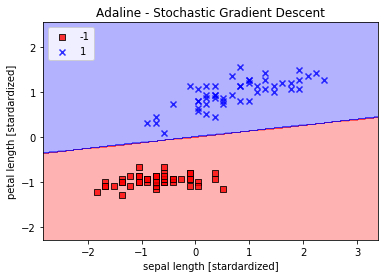

In [18]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [stardardized]')
plt.ylabel('petal length [stardardized]')
plt.legend(loc='upper left')
plt.show()

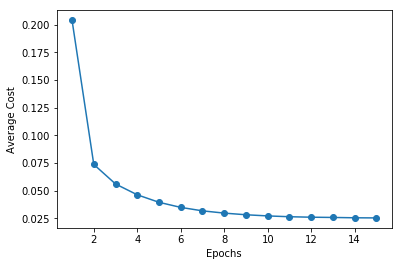

In [21]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, 
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

As we can see, the average cost goes down pretty quickly, and the final decision boundary after 15 epochs looks similar to the batch gradient descent Adaline. If we want to update our model, for example, in an online learning scenario with streaming data, we could simply call the *partial_fit* method on individual samples, for instance *ada.partial_fit(X_std[0, :], y[0])*. 

# Summary

In this chapter, we gained a good understand of the basic concepts of linear classifiers for supervised learning. After we implemented a perceptron, we saw how we can train adaptive linear neurons efficiently via a vectorized implementation of gradient descent and online learning via stochastic gradient descent. 

Now that we have seen how to implement simple classifiers in Python, we are ready to move on the next chapter, where we will use the Python scikit-learn machine learning library to get access to more advanced and powerful machine learning classifiers that are commonly used in academia as well as industry. The object-oriented approach that we used to implement the perceptron and Adaline algorithms will help with understanding the scikit-learn API, which is implemented based on the same core concepts that we used in this chapter: the *fit* and *predict* methods. Based on these core concepts, we will learn about logistic regression for modeling class probabilities and support vector machines for working with nonlinear decision boundaries. In addition, we will introduce a different class of supervised learning algorithms, tree-based algorithms, which are commonly combined into robust ensemble classifiers. 